<a href="https://colab.research.google.com/github/sraj-git/Data-Visualization-PIMA-Indian-Diabetes/blob/master/Analysising_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pima Indians Diabetes Database**

---


*The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.*




In [17]:
#loading dataset
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23873 bytes


Loading library and data

In [0]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV i/o
import seaborn as sbn #data visualization
import matplotlib.pyplot as plt
import time

In [0]:
data=pd.read_csv('diabetes.csv')

Exploratory data analysis. Seperate target from feature.

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
columns=data.columns
print(columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [41]:
#target
y=data.Outcome
drop_columns=['Outcome']
#features
x=data.drop(drop_columns, axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Plot diagnostic distribution.

Number of diabetic cases 268
Number of non diabetic cases 500


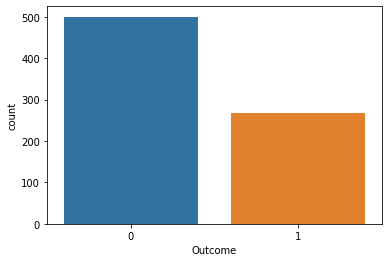

In [42]:
ax=sbn.countplot(y, label='count')
N, Y=y.value_counts()
print('Number of diabetic cases', Y)
print('Number of non diabetic cases', N)

In [43]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Class imbalance problem. Data visualization. Visualizing standard data with seaborn.

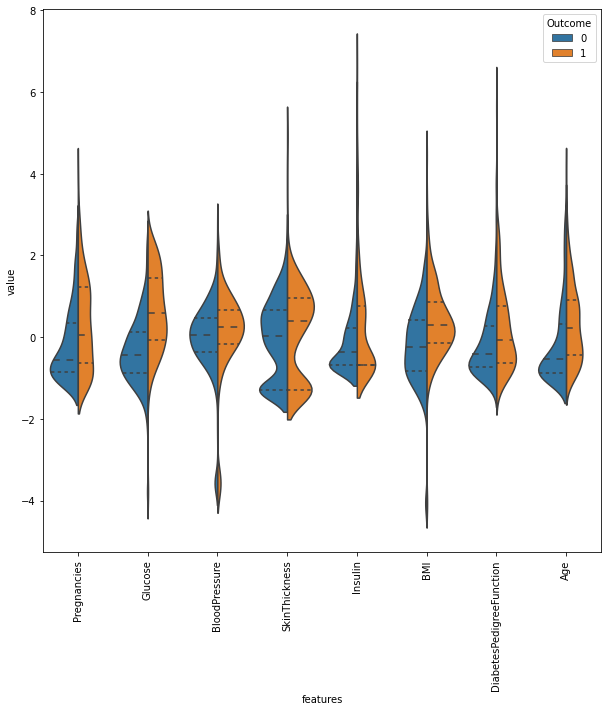

In [45]:
data=x
data_std=(data-data.mean())/data.std()
data=pd.concat([y, data_std], axis=1)
data=pd.melt(data, id_vars='Outcome', var_name='features', value_name='value')
plt.figure(figsize=(10, 10))
sbn.violinplot(x='features', y='value', hue='Outcome', data=data, split=True, inner='quart')
plt.xticks(rotation=90);

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

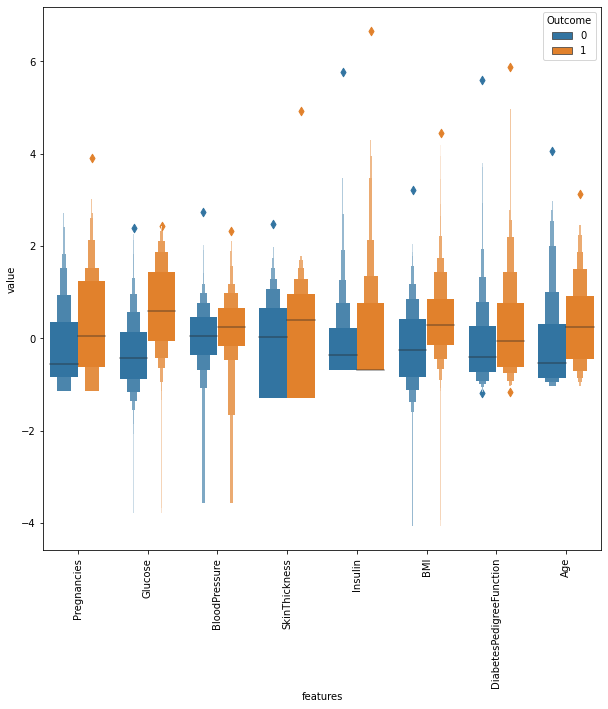

In [48]:
plt.figure(figsize=(10, 10))
sbn.boxenplot(x='features', y='value', hue='Outcome', data=data)
plt.xticks(rotation=90)

Using jointplot for feature comparision

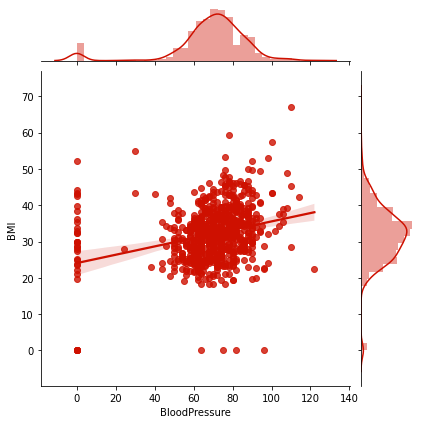

In [55]:
sbn.jointplot(x.loc[:,'BloodPressure'], x.loc[:,'BMI'], kind='regg', color='#ce1000')

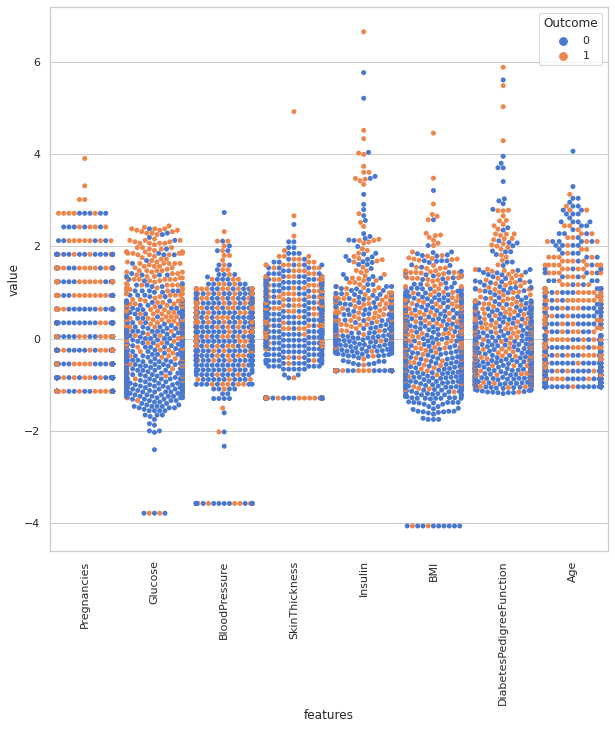

In [59]:
sbn.set(style='whitegrid', palette='muted')
data=x
data_std=(data-data.mean())/data.std()
data=pd.concat([y, data_std], axis=1)
data=pd.melt(data, id_vars='Outcome', var_name='features', value_name='value')
plt.figure(figsize=(10, 10))
sbn.swarmplot(x='features', y='value', hue='Outcome', data=data)
plt.xticks(rotation=90);

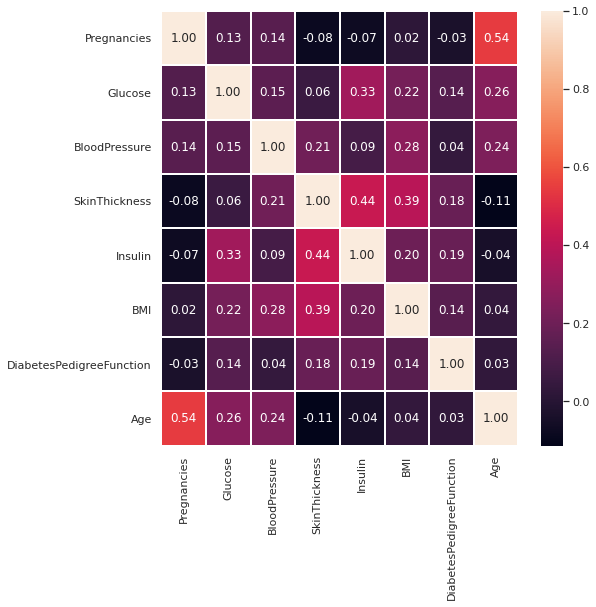

In [64]:
f, ax=plt.subplots(figsize=(8,8))
sbn.heatmap(x.corr(), annot=True, linewidths=1, fmt='.2f', ax=ax);